In [27]:
# Configurations for Google Colab
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !git clone https://github.com/GuitarsAI/ADSP_Tutorials.git 
    path="./ADSP_Tutorials"
else:
    print('Not running on CoLab')
    path="."

Running on CoLab
fatal: destination path 'ADSP_Tutorials' already exists and is not an empty directory.


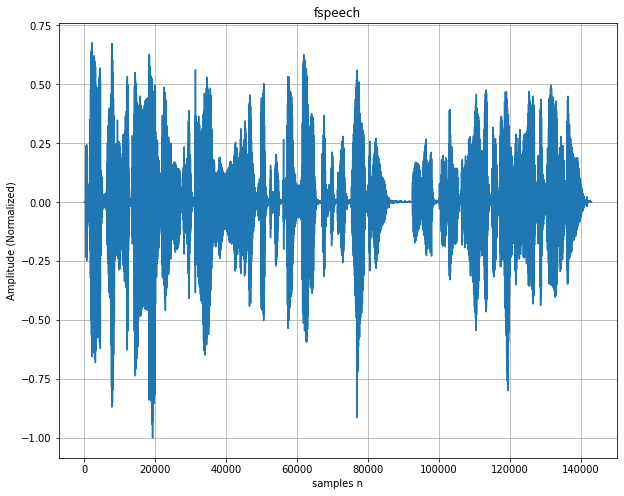

In [28]:
import librosa as lbr
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Import Speech
x , sr = lbr.load(path+'/audio/fspeech.wav', offset=0, duration=28.8)
x/=np.abs(x).max()
# Plot Audio
plt.figure(figsize=(10,8))
plt.plot(x)
plt.title('fspeech')
plt.xlabel('samples n')
plt.ylabel('Amplitude (Normalized)');
plt.grid()
# Listen
display(ipd.Audio(x, rate = sr ))

20
40


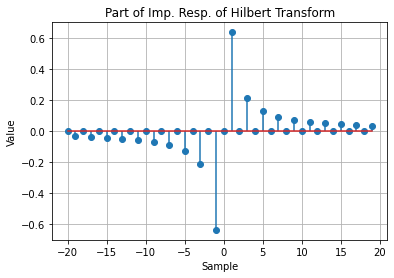

In [29]:

import matplotlib.pyplot as plt
import numpy as np
h=np.zeros(40);
n=np.arange(-19,20, 2)
print(len(n))
h[n+20] = 2/(np.pi*n)
print(len(h))

plt.figure()
plt.stem(np.arange(-20,20),h,use_line_collection=True)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Part of Imp. Resp. of Hilbert Transform')
plt.grid()

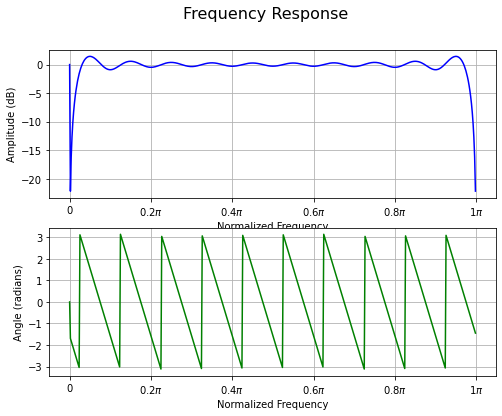

In [30]:
# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(h)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
#plt.ylim((-0.001,0.001))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()

In [31]:
# construct a delayed impulse to implement the 
# delay for the real part:
delt = np.zeros(40)
delt[19] = 1
#delt =
#0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
#Then we need to add our imaginary part as our 
#Hilbert transform to obtain our complex filter:
h = np.zeros(40);
n = np.arange(-19, 20+1, 2)
h[n+19] = 2/(np.pi*n)
hone = delt+h*1j

hone

array([0.-0.0335063j , 0.+0.j        , 0.-0.03744822j, 0.+0.j        ,
       0.-0.04244132j, 0.+0.j        , 0.-0.04897075j, 0.+0.j        ,
       0.-0.05787452j, 0.+0.j        , 0.-0.07073553j, 0.+0.j        ,
       0.-0.09094568j, 0.+0.j        , 0.-0.12732395j, 0.+0.j        ,
       0.-0.21220659j, 0.+0.j        , 0.-0.63661977j, 1.+0.j        ,
       0.+0.63661977j, 0.+0.j        , 0.+0.21220659j, 0.+0.j        ,
       0.+0.12732395j, 0.+0.j        , 0.+0.09094568j, 0.+0.j        ,
       0.+0.07073553j, 0.+0.j        , 0.+0.05787452j, 0.+0.j        ,
       0.+0.04897075j, 0.+0.j        , 0.+0.04244132j, 0.+0.j        ,
       0.+0.03744822j, 0.+0.j        , 0.+0.0335063j , 0.+0.j        ])

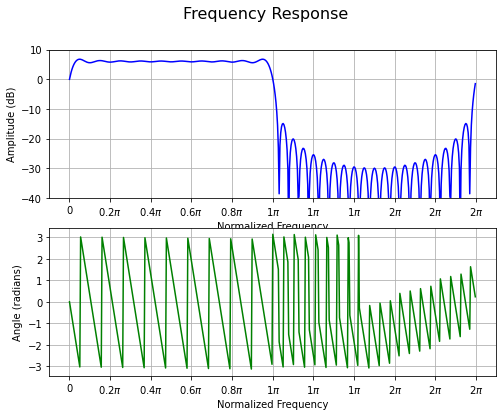

In [32]:
from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(hone, whole=True)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
plt.ylim((-40,10))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()

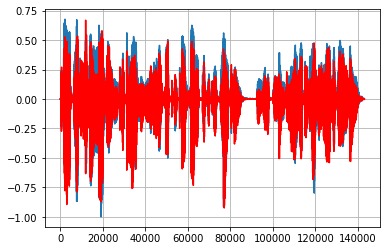

In [33]:
import scipy.signal as sp
xhone = sp.convolve(x, hone)
plt.figure()
plt.plot(np.real(xhone))
plt.plot(np.imag(xhone),'r')
plt.grid()

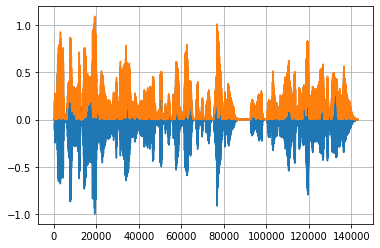

In [56]:
plt.figure()
plt.plot(x)
plt.plot(np.abs(xhone))
plt.grid()

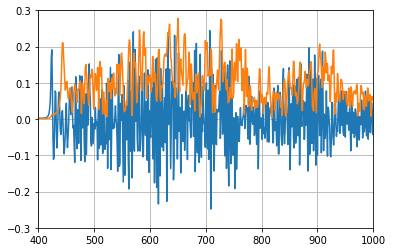

In [57]:
plt.figure()
plt.plot(x)
plt.plot(np.abs(xhone))
plt.axis([400,1000,-0.3,0.3])
plt.grid()

In [65]:
#from scipy.fft import fft, fftfreq

#fft(xhone)

#plt.plot(fft(x))

Text(0, 0.5, 'Magnitude of Frequency Response in dB')

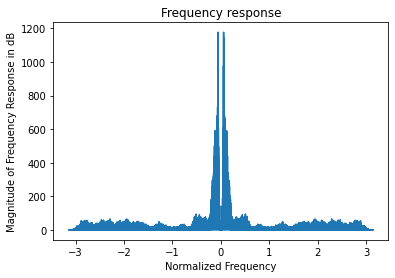

In [64]:
FFT = abs(fft(x))
freqs = fftfreq(x.size)

plt.plot(freqs*2*np.pi, FFT)
plt.title('Frequency response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude of Frequency Response in dB')


Text(0, 0.5, 'Magnitude of Frequency Response in dB')

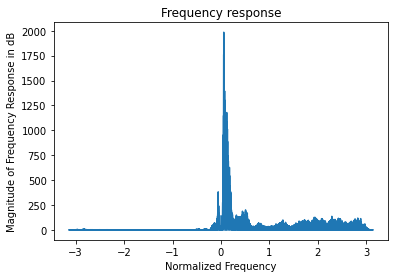

In [63]:
FFT = abs(fft(xhone))
freqs = fftfreq(xhone.size)

plt.plot(freqs*2*np.pi, FFT)
plt.title('Frequency response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude of Frequency Response in dB')

In [37]:
####################wiener filter###########

In [38]:
from scipy import signal as sp
import numpy as np
import IPython.display as ipd
import librosa as lbr
import wave
import struct

In [39]:
# Define waveread
def wavread(sndfile):
    wf=wave.open(sndfile,'rb');
    nchan=wf.getnchannels();
    bytes=wf.getsampwidth();
    rate=wf.getframerate();
    length=wf.getnframes();
    print("Number of channels: ", nchan);
    print("Number of bytes per sample:", bytes);
    print("Sampling rate: ", rate);
    print("Number of samples:", length);
    data=wf.readframes(length);
    if bytes==2:
        shorts = (struct.unpack( 'h' * length, data ));
    else:
        shorts = (struct.unpack( 'B' * length, data ));
    wf.close;
    return shorts, rate;

# Load audio file
x, fs = wavread(path+'/audio/fspeech.wav')

Number of channels:  1
Number of bytes per sample: 2
Sampling rate:  32000
Number of samples: 207612


In [40]:
y=x+0.05*(np.random.random(np.shape(x))-0.5)*np.max(x)

In [41]:
#make x and y  matrices and transpose them into a column:
x=np.matrix(x).T
y=np.matrix(y).T


In [42]:
#we assume 10 coefficients for our Wiener filter. 
#10 to 12 is a good number for speech signals.
A = np.matrix(np.zeros((100000, 14)))
for m in range(100000):
    A[m,:] = y[m+np.arange(14)].T
#Our matrix has 100000 rows and 10 colums:
print (A.shape)

(100000, 14)


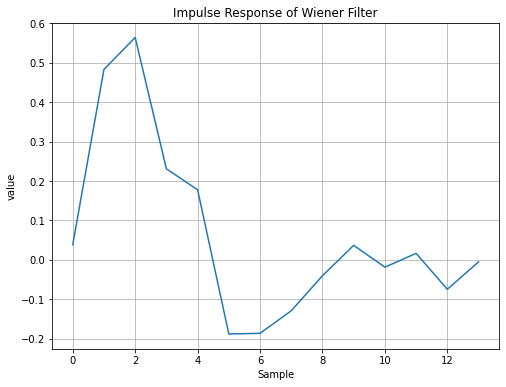

In [43]:
import matplotlib.pyplot as plt
h=np.linalg.inv(A.T*A)*A.T*x[15:100000+15]
plt.figure(figsize=(8,6))
plt.plot(np.flipud(h)) 
plt.xlabel('Sample')
plt.ylabel('value')
plt.title('Impulse Response of Wiener Filter')
plt.grid()

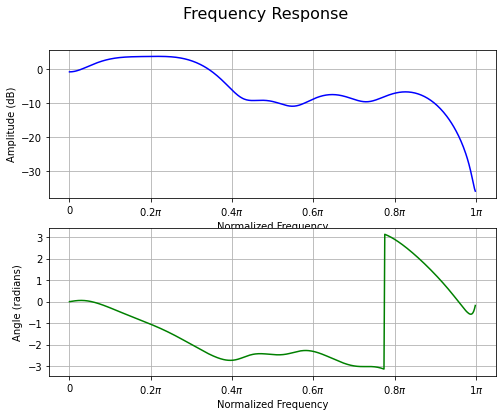

In [44]:
from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(np.flipud(h))

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
#plt.ylim((-0.001,0.001))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


In [45]:
SP_filtered = sp.wiener(y, mysize=21)

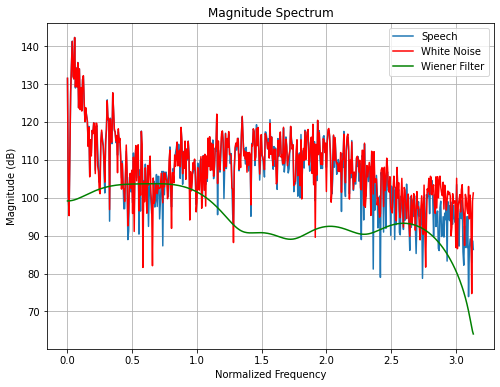

In [46]:
w,Hspeech=sp.freqz(x);
w,Hnoise=sp.freqz(y)
w,Hw=sp.freqz(np.flipud(h))
plt.figure(figsize=(8,6))
plt.plot(w,20*np.log10(abs(Hspeech))); 
plt.plot(w,20*np.log10(abs(Hnoise)),'r');
#plot and shift the filter into the vicinity of the signal:
plt.plot(w,20*np.log10(abs(Hw))+100,'g')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.legend(('Speech', 'White Noise', 'Wiener Filter'))
plt.title('Magnitude Spectrum')
plt.grid()

In [47]:
xw = sp.lfilter(np.array(np.flipud(h).T)[0],[1],np.array(y.T)[0])

In [48]:
import numpy as np

In [49]:
#print( np.shape(x))
Noisy_Signal = np.sum(np.power(y[:200000]-x[:200000],2))/200000
Filtered_Noisy_Signal = np.sum(np.power(xw[2:200000+2]-x[:200000].T,2))/200000
print(Noisy_Signal)
print(Filtered_Noisy_Signal)


32555.605388140822
625596.344614327


In [50]:
print("Original Signal")
x , sr = lbr.load(path+'/audio/fspeech.wav', offset=0, duration=28.8)
x/=np.abs(x).max()
# Listen
display(ipd.Audio(x, rate = sr ))

print("Noisy Signal")

np.random.seed(27)
y = x+0.05*(np.random.random(np.shape(x))-0.5)*np.max(x)
display(ipd.Audio(y, rate = sr ))

print("Filtered Signal")

xw/=np.abs(xw).max()
display(ipd.Audio(xw, rate = 1.5*sr ))

Original Signal


Noisy Signal


Filtered Signal
